# What is Supervised Learning?

## 0. Supervised vs. Unsupervised Learning

In supervised learning, the model defines the effect one set of observations, called inputs, has on another set of observations, called outputs. We are given a dataset with response variables and predictor variables and use this to try to come up with a function that maps predictor variables to response variables. We assume that there is some true mapping function $f$, and try to come up with an approximation $\hat f$ so that given new data, we can make accurate predictions.

Unsupervised learning is where you only have input data and no corresponding output variables. The goal for unsupervised learning is to model the underlying structure or distribution in the data in order to learn more about the data. These are called unsupervised learning because unlike supervised learning above there is no correct answers and there is no teacher. Algorithms are left on their own to discover interesting structure and patterns in the data.



## 1. Types of Variables: Predictors and Response


In a typical supervised learning problem, we have some number of predictors variables and a response (or outcome) variable. The outcome variable is the variable that we would like to predict. The predictor variables are the ones that we have at our disposal to try to determine the outcome variable. We usually label the number of predictor variables as $p$, and we call the $i$th instance of the $j$th predictor variable $X_{i,j}$. We call the $i$th instance of the response variable $Y_i$. Generally we write $Y = f(X) + \epsilon$, where $\epsilon$ represents the true error of the relationship between $X$ and $Y$, which is impossible to predict. 

Summary of Notation:

$\hat{Y_i}$ is the predicted outcome from our model. 

$Y_i$ is the true outcome. 

$X_{i,j}$ is the jth predictor variable

We sometimes refer to the predictor variables collectively as a vector: $X_i$


## 2. Regression vs Classification 

There are two types of supervised learning problems: regression and classification. In regression, we have a continuous response variable, with ordering. In classification, we have discrete response variables, without ordering. 

For example, in a regression problem, we might try to predict the price of a house given predictor variables such as size, and geographic location. 

In a classification problem we might try to predict whether someone has a disease or doesn't have a disease based on various health metrics

## 3. Measuring Performance: Loss Functions

Once we have a model, to evaluate how good it is we need some metric of performance. We call this metric the loss function. Below are two typical examples of loss functions, used for regression problems.


Residual Sum of Squares: $RSS = \sum_{i=1}^n{(y_i - \hat{y_i})^2}$

Mean Squared Error: $MSE = \frac{1}{n} \sum_{i=1}^n{(y_i - \hat{y_i})^2}$


Explain why the Residual Sum of Squares makes sense to evaluate performance for a regression problem

## 4. Splitting the Data into Training and Test subsets

One way to validate our model is to split the dataset we're given into random subsets, training and test. This is to prevent overfitting, where our predictive model is taking into account fluctuations due to the irreducible error ($\epsilon$) in the dataset rather than solely the function $f$ that relates $X$ (predictors) and $Y$ (response). Because of this, it's important to validate our model by testing it on a dataset other than the training set. 

What are the disadvantages of this approach? 

Another way to select a model is to use metrics (loss functions) that penalize flexibility in the model. We'll talk more about this later. 

# Linear Regression

[Linear Regression]()

Learning regression (which many of you have learned about before) is a robust method for modeling continuous data. We're teaching it because it's used a *lot* in practice, and it's fairly simple to get your head around.

Briefly, let's set the situation up: suppose you have a list of coordinate pairs $(x_1, y_1), (x_2, y_2), \ldots (x_n, y_n)$, and you would like to predict $y$ values corresponding to a particular $x'$. Our model will look like $f(x) = mx + b$, where our answer to the question will be $f(x')$ of course. Now, since this is real, messy data, of course all of the $x_i$ and $y_i$ are not going to follow the model. In reality, there will be some *error*, which we call the residuals (i.e., the difference between $f(x_i)$ and $y_i$).

### When to use linear regression?
Use linear regression when you have the following:
1. The `x` values are fixed, known values (or at least have very low variance compared to the residuals).
2. Reasonable expectation that the data follows a linear model (this is usually the case, since by assumption (1) you can use as inputs any function of $x$ as a parameter to your regression).
3. The residuals are normally distributed with constant variance, and are independent.

Usually, the last assumption is the most difficult to satisfy, since if you have data across a large $x$-span, then the errors not usually univariate (think about what a 10% measurement error at 1mm looks like and what it looks like at 100m). Remember that *variance*, (or the square of standard deviation) is a scalar quantity, unlike z-score.

### Ordinary Least Squares (OLS) Regression
The goal with OLS is to minimize the L2 error, or the sum of squares error. Consider a candidate $m$ and $b$. The sum of squares error is 
$$\sum_{i = 1}^n (mx_i + b - y_i)^2$$
To minimize this, we can take the derivative w.r.t. $m$ and the derivative w.r.t. $b$, and set them equal to 0. We get:

$$\sum_{i = 1}^n 2(mx_i + b - y_i) = 0$$

$$\sum_{i = 1}^n 2x_i(mx_i + b - y_i) = 0$$

Remember that we know every value except for $m$ and $b$. This gives us, then, a system of 2 equations in 2 variables. Solving that system gives us the OLS solution:

$$m = \frac{\overline{xy} - \overline{x} \cdot \overline{y}}{\overline{x^2} - \overline{x}^2}$$
$$b = \overline{y} - m\cdot\overline{x}$$

where we've used the notation $\overline{x}$ to mean the average of the $x_i$. Note in particular that the average $\overline{xy}$ means $(\sum_{i = 1}^n x_iy_i)/N$. 

### Ok, let's implement that

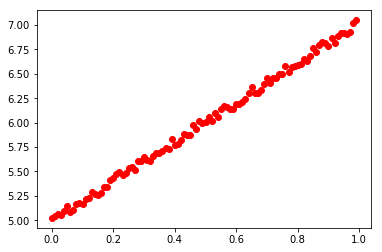

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def ols(xes, yes):
    """Do Ordinary Least Squares (OLS) regression on a set of x and y positions"""
    n = len(xes)
    xbar = np.mean(xes)
    print(xbar)
    ybar = np.mean(yes)
    print(ybar)
    xvar = np.mean([x*x for x in xes])
    xybar = np.mean([x*y for (x,y) in zip(xes, yes)])
    m = (xybar - (xbar * ybar))/(xvar - xbar**2)
    b = ybar - m*xbar
    return m, b

x = np.arange(100)/100.
# generate y using a 'true' mean and y intercept, and then add noise
y = (x*2.02 + 5.) + (np.random.rand(100) * 0.1 - 0.05)
plt.plot(x, y, 'ro')

0.495
5.99749598767
2.01308874121 5.00101706078


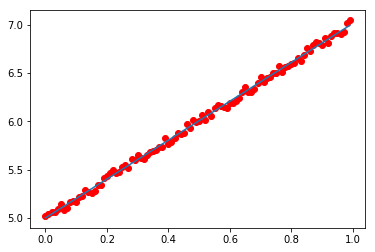

In [2]:
m, b = ols(x, y)
print(m, b)
plt.plot(x, y, 'ro')
plt.plot(x, m*x + b)

### So that works!
We basically (to within a reasonable level of error) recovered the original slope and intercept of that data. We have a good model for predicting points in the future. However, we'd like to know **how** good our model is, which means we need to do cross validation. Luckily, there's a great framework for this built into `sklearn`:

Coefficients: 
 [ 2.01227392]
Mean squared error: 0.00
Variance score: 1.00


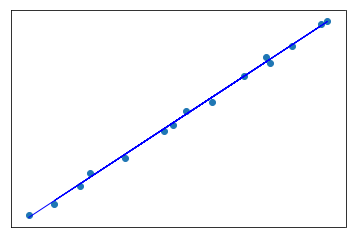

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15)

# unfortunately, the shape of x_train and x_test isn't quite right
x_train = x_train.reshape(x_train.shape[0], 1)
x_test = x_test.reshape(x_test.shape[0], 1)

# let's use sklearn's nice linear regression API
regr = linear_model.LinearRegression()

# train the model using the training sets
regr.fit(x_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f" % np.mean((regr.predict(x_test) - y_test) ** 2.0))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))

# Plot outputs
plt.scatter(x_test, y_test, marker='o')
plt.plot(x_test, regr.predict(x_test), color='blue', linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

# Classification Methods

Recall that two tasks of supervised learning are regression and classification. In regression, we have a continuous response variable with ordering, while classification involves a discrete response variable without ordering. Last time we looked at linear models for regression, this week we'll look at a few classification models. 

The goal of classification is to create a decision boundary, which is a hyperplane within the feature space that separates different classes.

![Classification](http://www.hact.org.uk/sites/default/files/uploads/Archives/2014/5/Classification1.png)

Consider the binary example of classifying cats and dogs. The horizontal axis (feature 1) may be an pet's weight while the vertical axis is the fur length, with the black line denoting the hyperplane separating cats and dogs. Given a new instance of an animal, we plot its weight and fur length in this feature space and decide whether it is a cat or a dog depending on which side of the hyperplane it falls under. 

The most basic classification method is [logistic regression](https://en.wikipedia.org/wiki/Logistic_regression). We recommend reading up on the basics of logistic regression (the Wikipedia page presents a very intuitive explanation and example), but the intuition and model implementation are very similar to linear regression. Today, we will instead present some advanced classification models that approach the classification problem from different perspectives.

# Support Vector Machines

Support vector machines (SVMs) are among the most powerful and commonly used models for supervised classification. We will look at the intuition and mathematics behind SVM classifiers, then use them to solve some classification problems.

### Decision Boundaries and Margins

Let's look at classification in a simple linearly separable two-class case. As explained above, when faced with the classification problem, we want to find a "decision boundary" in the input space, where points on one side of the boundary are predicted to be in class A and points on the other side predicted to be in class B. 

![Image of Margins](https://www.dtreg.com/uploaded/pageimg/SvmMargin2.jpg)

One intuitive way to define a decision boundary is to draw the line (shown on the right) that results in the greatest distance between the points of each class and the decision boundary. The SVM model is based on precisely on this approach, and the SVM is named for the support vector, the inputs for each class that are the closest to the margin. 

### Mathematics

Given the generic two class classification setup with data $ \{x_n, t_n\}_{n = 1}^N$ where $x_n \in \mathbb{R}^D$ and $t_n \in \{-1, 1\}$, we want to find the optimal weights $w$ and bias $b$ for the model $y(x; w, b) = w^Tx + b$.

To define the concept of the margin mathematically, first notice that $w$ will be orthogonal to the decision boundary, so we can decompose each vector into $x = x_{\perp} + r \frac{w}{||w||_2}$, where the magnitude of $r$ is the margin. Noting that $t_ny(x_n;w, b)$ will always be positive, we can rearrange this decomposition to define the margin for point $x_n$ to be 

$$ r_n = \frac{t_n(w^Tx_n + b)}{||w||_2} $$

The overall margin $r$ is determined by the margins of the support vectors, so 

$$ r = \min_n \frac{t_n(w^Tx_n + b)}{||w||_2}$$

This gives us the error for the optimization problem over $w$ and $b$.

### Margin Maximization and Quadratic Programming (optional)

To find the optimal $w$ and $b$ for the SVM model, we want to maximize the expression for $r$ formalized above. This actual optimization of $w$ and $b$ relies on complicated math that isn't crucial to understanding *why* SVMs work.

If you want to know *how* SVMs work, the basic idea is that the process of optimizing $r$ can be expressed as a constrained optimization problem with a form that can be solved with quadratic programming. We can also apply the notion of Lagrangian Duality to this expression for $r$ to obtain a form that allows us to perform the kernel trick, which we will briefly explain.

https://en.wikipedia.org/wiki/Quadratic_programming

http://stats.stackexchange.com/questions/19181/why-bother-with-the-dual-problem-when-fitting-svm

### Kernel Functions

One of the reasons why SVMs can be so powerful is their ability to utilize the kernel trick.

In the Lagrangian optimization of the margin, the solution depends only on the inputs through the term $\phi(x)^T\phi(z)$. A Kernel is defined simply as a function that takes in two vectors of the input space and outputs a scalar representing some similarity metric. 

Specifically, a kernel function $K$ is defined such that $K(x, z) = \phi(x)^T\phi(z)$ for some feature representation $\phi$. 

The power of kernels is that certain feature representations result in kernels that can be expressed in a closed form. For example, the RBF kernel, $K(x, z) = \phi_{RBF}(x)^T\phi_{RBF}(z)$ can be simplified as $K(x, z) = \exp(-||x - z||^2)$. $\phi_{RBF}(x)$ is an infinite dimension feature representation that would be impossible to calculate for each input $x$, but the key here is that *we don't actually have to calculate this feature representation* since we only deal with terms of the form $\phi_{RBF}(x)^T\phi_{RBF}(z)$, which can be computed in a very simple way.

The upshot of all of this is that the kernel trick takes advatnage of the fact that SVMs rely only on a dot product over the feature space, rather than individual feature vectors. This allows us to work with immensely complicated feature representations while keeping the actual computation of the SVM very simple. For a more in depth look at kernels (and SVMs in general), the [Stanford ML notes](http://cs229.stanford.edu/notes/cs229-notes3.pdf) are a great resource.   

## Application

Here's Scikit-learn's example of how to use their SVM implementation, classifying flowers by sepal length and width. First, we load a toy dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

Now, we can fit different SVM models using different kernels.

In [2]:
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

Then, we can plot the decision boundaries for each of the SVM models that we fitted.

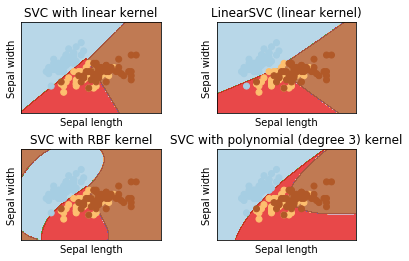

In [3]:
h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

# Decision Trees and Random Forests

Our second advanced supervised learning method is the decision tree, a powerful yet intuitive supervised method.

### Intuition

Suppose you're classifying dogs, and you know (as an expert in the field) that all poodles have tails shorter than 15mm, while all dachshunds have tails longer than 25mm. However, the difference between golden retrievers and poodles is that golden retrievers are taller than 40mm in height, while dachshunds are less than 35mm tall. 

Suppose I give you a dataset of dogs, where we've measured the heights and tail lengths. The approach we covered last week would have you build a linear model taking in the features $f_h$ and $f_t$, and find a threshold/bias for $\alpha f_h + \beta f_t$.

But, you think, why bother? I already know how to decide the breed of a dog. Why spend all this energy?

In [4]:
def breed(tail, height):
    if tail > 25:
        if height < 35:
            return 'dachshund'
        else:
            return 'golden retriever'
    elif tail < 15:
        return 'poodle'
    else:
        return 'unknown'

As you can probably tell, the problem with this strategy is that while it may work in cases where you are an expert, it doesn't help you figure out what to do when you *aren't* an expert. And there will be data science problems that you will need to solve where you no know nothing about the problem, and there aren't *any* experts.

Still, this strategy has some positive factors:
+ It's fast to evaluate
+ It's nonlinear (which means it's sometimes more flexible than linear models)
+ It's very easy to read

Don't discount the latter criteria - when your model is getting 98% accuracy and you want to get to 99% accuracy (to pass your class, to do your job, or to [win a million dollars](https://en.wikipedia.org/wiki/Netflix_Prize)), you're going to want to improve results. What better way to improve your accuracy than to look at the errors that you made and figure out how to fix them? It's very hard to understand why you are making errors in many models, especially SVMs and neural nets, and this model is much easier.

### Constructing Decision Trees

Ok, how can we construct these decision trees in cases when we aren't experts and know the correct splits beforehand? It turns out that there are a lot of different ways, most notably CART (Classification and Regression Trees) and C5.0. Let's look at a simplified version of the CART algorithm:

We return to our generic two class classification setup with data $ \{x_n, t_n\}_{n = 1}^N$ where $x_n \in \mathbb{R}^D$ and $t_n \in \{-1, 1\}$.

We're going to construct the tree in a top-down approach - that is, we're going to start at the top, create a node, and then walk downwards, creating more nodes as we go. Suppose that we want to branch on feature $k$, and there are two possible values for feature $k$ (which is a label, rather than a continuous variable), `long tail` and `short tail`. If we split based on feature $k$, we'll have two clumps of data, $S_{long}$, and $S_{short}$. How can we tell whether this is a good split? We'll look at two metrics to evaluate how to choose $k$ at every step.

#### Gini Impurity

Gini impurity is a measure of the *mixiness* of a set. If a set of points is really pure (i.e. 100% one label or 100% another label) the Gini impurity will be low. For a given set $S$ (say, $S' = S_{long}$) we first get the fraction $f_{good}$ of $S'$ that consists of `good` and the fraction $f_{bad}$ that is `bad`. More generally, let the labels be $i = [0, 1, 2, ... k]$, and we calculate $f_i$ for all $i$. Then,
$$I_G(S') = \sum_{i = 0}^k f_i(1 - f_i)$$

*Note: as a function of each $f_i$s, $I_G$ is maximized whenever $f_i = 0$ or $f_i = 1$ (i.e. when the set is the most pure).*

So, to choose the best feature to branch on, we just choose whichever reduces the total Gini impurity the most ($I_G(S_{long}) + I_G(S_{short})$).

Example: if our branch factor is `breed`, and the set of long haired dogs contains 45 good long haired dogs and 15 bad long haired dogs, and the set of short haired dogs contains 60 good short haired dogs and only 5 bad short haired dogs, the overall Gini impurity of the split is:
$$I_G = \left(\frac{45}{105}\cdot\frac{60}{105} + \frac{15}{20}\cdot\frac{5}{20}\right) + \left(\frac{60}{105}\cdot\frac{45}{105} + \frac{5}{20}\cdot\frac{15}{20}\right) = 0.4324$$

> Question: if you look closely above, the Gini impurity of each of the sets above is the same. Is this always true?

However, if we split based on `color`, and the brown dogs were 100 good and 10 bad, and the black dogs were 5 good and 10 bad, then the Gini impurity is:

$$I_G = \left(\frac{100}{105}\cdot\frac{5}{105} + \frac{10}{20}\cdot\frac{10}{20}\right) + \left(\frac{5}{105}\cdot\frac{100}{105} + \frac{10}{20}\cdot\frac{100}{20}\right) = 0.2954$$

So, we'd choose to branch based on `color`, which makes some intuitive sense.

#### Information Gain

Similar to Gini impurity, information gain is another metric. Basically, for any mixed up set we can measure it's [Shannon entropy](https://en.wikipedia.org/wiki/Entropy_(information_theory), which is a measure of randomness. So, at each stage we try to reduce the entropy by as much as possible. However, given a piece of information $I$, the difference in entropy before knowing $I$ (e.g. the value of a feature) and the entropy afterwards is called the **information gain**.  

$$I_E(S') = -\sum_{i = 0}^k f_i \cdot \log k_i$$

### Analysis

As you can tell, decision trees are a powerful tool for both classification and regression, formalizing an intuitive method of classification. Decision trees can be more versatile than SVMs, which rely on choosing the right kernel and certain assumptions of the data (some degree of seperability, etc). 

So far our supervised learning toolkit consists of regression, decision trees, and SVMs. There are plenty of other models for supervised learning like neural networks and ensemble methods, which we will not get to during our workshops. If you need to use any of these advanced models, Scikit-learn provides easy-to-use implementations for these just like it does for the models that we've seen. For the upcoming workshop, you will get the opportunity to apply different classification models and compare their results.